<a href="https://colab.research.google.com/github/tutsilianna/Automatic_Text_Processing_and_Image_Processing/blob/main/Exam/demo_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

You are provided with a list of preprocesed and normalized documents (one document is one sentence). Calculate the $PPMI$ values for the specified terms pairs.

Let's fix the formula of $PPMI$ calculation basing on the simple frequencies:

$$ PPMI(w_0, w_1) = \max\{\log_2\frac{N Count(w_0, w_1)}{Count(w_0)Count(w_1)}, 0\}, $$
where $Count(w_0, w_1)$ is the number of documents containing both terms $w_0$  and $w_1$ , $N$ is the total number of documents, $Count(w)$ is the number of documents containing the $w$ term.


The list of documents is below:

* `add appreciate capability developing greatly hello information input interface looking unix user voice workstation would`
* `corporation expressed lines message necessarily opinions oracle oracle unauthenticated user user written`
* `article ericsson expressed lines necessarily opinions strictly user wtm`
* `corporation distribution expressed message na necessarily opinions oracle unauthenticated user user written`
* `convex corp expressed lines necessarily opinions paulb user`
* `another cars cars experiences info people public recently requested responses seen user`
* `article bcc mail nielsmm nielsmm shell status user`
* `convex corp expressed kdw kenneth lines necessarily opinions user whitehead writes`
* `able custom display graphics imagery specify support user widget widget writing xpert`
* `corporation expressed message necessarily opinions oracle unauthenticated user user written`
* `across articles critiquing interface macintosh many ms operate opinions personal pointers systems toolkits user windowing windows x`
* `europe genocide god governments james moving serbian sledd states united user work writes`
* `contents following interface part problems program simulation system table user widgets work`
* `article convex corp expressed lines mcovingt necessarily opinions user`
* `bear box dialog new please programming returns trying upon user value x`
* `computer configuration follows hello lines netlanders novice problem question user x x xgod`
* `article convex corp expressed franceschi lines necessarily opinions user`
* `convex corp expressed investigating lines marshall necessarily odd opinions pressure rise small user`
* `article convex corp expressed lines necessarily opinions user`
* `able also arbitrarily change display models objects parameters program user viewing wireframe wireframe working`

In [ ]:
import math

def Count(terms, w0, w1=None):
    count = 0
    if not w1:
        for term in terms:
            count += w0 in term.split(' ')
    elif w1:
        for term in terms:
            count += w0 in term.split(' ') and w1 in term.split(' ')
    return count

def PPMI(w0, w1, N, terms):
    return max(0, math.log2((N * Count(terms, w0=w0, w1=w1)) /(Count(terms, w0=w0) * Count(terms, w0=w1)) ))

In [ ]:
terms = [
    'add appreciate capability developing greatly hello information input interface looking unix user voice workstation would',
    'corporation expressed lines message necessarily opinions oracle oracle unauthenticated user user written',
    'article ericsson expressed lines necessarily opinions strictly user wtm',
    'corporation distribution expressed message na necessarily opinions oracle unauthenticated user user written',
    'convex corp expressed lines necessarily opinions paulb user',
    'another cars cars experiences info people public recently requested responses seen user',
    'article bcc mail nielsmm nielsmm shell status user',
    'convex corp expressed kdw kenneth lines necessarily opinions user whitehead writes',
    'able custom display graphics imagery specify support user widget widget writing xpert',
    'corporation expressed message necessarily opinions oracle unauthenticated user user written',
    'across articles critiquing interface macintosh many ms operate opinions personal pointers systems toolkits user windowing windows x',
    'europe genocide god governments james moving serbian sledd states united user work writes',
    'contents following interface part problems program simulation system table user widgets work',
    'article convex corp expressed lines mcovingt necessarily opinions user',
    'bear box dialog new please programming returns trying upon user value x',
    'computer configuration follows hello lines netlanders novice problem question user x x xgod',
    'article convex corp expressed franceschi lines necessarily opinions user',
    'convex corp expressed investigating lines marshall necessarily odd opinions pressure rise small user',
    'article convex corp expressed lines necessarily opinions user',
    'able also arbitrarily change display models objects parameters program user viewing wireframe wireframe working'
]

* Enter the $PPMI$ value for the terms `corporation` and` oracle`

In [ ]:
round(PPMI('corporation', 'oracle', len(terms), terms), 3)

2.737

Enter the  $PPMI$ value for the terms `x` and `lines`

In [ ]:
round(PPMI('x', 'lines', len(terms), terms), 3)

0

Enter the  $PPMI$  value for the terms `opinions` and `user`:

In [ ]:
round(PPMI('opinions', 'user', len(terms), terms), 3)

0

# Task 2

While making the task work with images as cv2 objects, do not save them as files!

1. Read the image using OpenCV library:
2. Convert it to RGB colors.
3. Compress the image (hereinafter the compressed image) to the width of `1967` pixels, observing the ratio of the original image. **Please note:** do not round the sides ratio while calculating. If the height turns out to be a non integer value, then round the heigt value down to an integer. Use `cv2.resize()` with parameter `interpolation = cv2.INTER_AREA`.
    * Enter the ratio of the original image width to its height
    * Enter the height of the resulting compressed image
4. Plot a histogram of the compressed image in the RGB palette. Compare the intensity density estimation across the channels R, G and B.
    * Enter the highest density value among three channels:

In [24]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

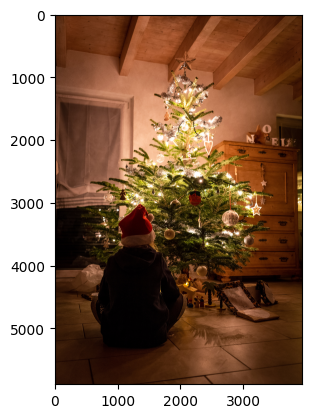

In [26]:
img = cv2.imread('/content/s-b-vonlanthen-CMpmgBy833w-unsplash.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [30]:
height = img.shape[0]
width  = img.shape[1]
proportion = round(width / height, 3)
proportion

0.668

In [28]:
width_  = 1967
height_ = round(width_ / proportion)
height_, width_

(2946, 1967)

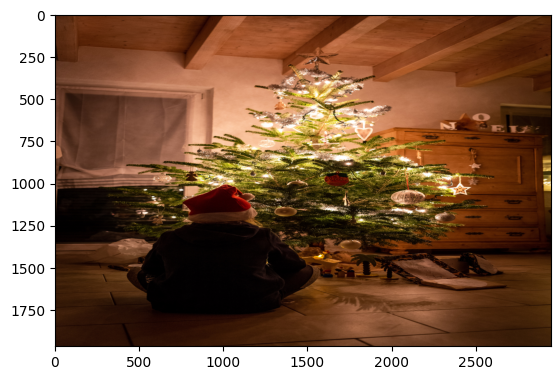

In [29]:
dim = (height_, width_)
resized_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_img)
plt.show()

The maximum density value among three channels: 0.0673


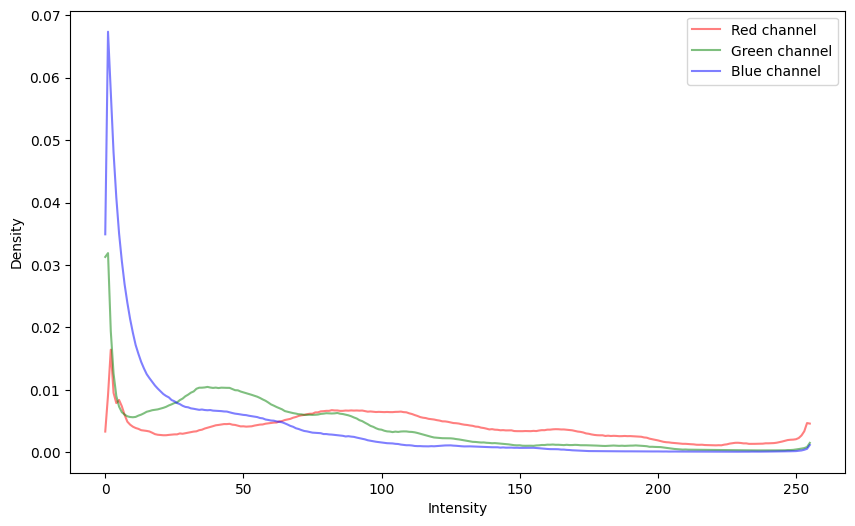

In [37]:
import numpy as np

img_red   = resized_img[:, :, 0]
img_green = resized_img[:, :, 1]
img_blue  = resized_img[:, :, 2]

gray_hist_red, bins_r   = np.histogram(img_red.ravel(), bins=256, range=(0, 256), density=True)
gray_hist_green, bins_g = np.histogram(img_green.ravel(), bins=256, range=(0, 256), density=True)
gray_hist_blue, bins_b  = np.histogram(img_blue.ravel(), bins=256, range=(0, 256), density=True)

max_hn_red   = np.max(gray_hist_red)
max_hn_green = np.max(gray_hist_green)
max_hn_blue  = np.max(gray_hist_blue)

max_density_value = max(max_hn_red, max_hn_green, max_hn_blue)

print("The maximum density value among three channels:", round(max_density_value, 4))

plt.figure(figsize=(10, 6))
plt.plot(bins_r[:-1], gray_hist_red, color='red', alpha=0.5, label='Red channel')
plt.plot(bins_g[:-1], gray_hist_green, color='green', alpha=0.5, label='Green channel')
plt.plot(bins_b[:-1], gray_hist_blue, color='blue', alpha=0.5, label='Blue channel')
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.legend()
plt.show()